In [6]:
import numpy as np
import pandas as pd
import os
from pathlib import Path 
from fanalysis.pca import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt 
from sklearn.cluster import DBSCAN

In [7]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

def read_clean_csv (df) : 
    path = Path(os.getcwd()) 
    p_parent = path.parent
    data_path = str(p_parent) + r"\data" + "\\" + str(df) + ".csv"
    df = pd.read_csv(str(data_path)).set_index("customer_unique_id")    
    clean_dataset(df)
    return df


def pca_kmeans(df):
    
    path = Path(os.getcwd()) 
    p_parent = path.parent
    data_path = str(p_parent) + r"\data" + "\\" + str(df) + ".csv"
    df = pd.read_csv(str(data_path)).set_index("customer_unique_id")    
    clean_dataset(df)

    X = df.values
    #nombre de variables
    p = df.shape[1]
    #nombre d'observations
    n = df.shape[0]


   # Perform ACP
    pca = PCA()
    pca_components = pca.fit_transform(X)

    
    # Choose the number of clusters using the elbow method
    
    scaler = MinMaxScaler()
    # scaler = StandardScaler()
    preprocessor = ColumnTransformer([
    ('scaler', scaler, df.columns)])
    
    # Elbow method
    
    kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor), 
    ("kelbowvisualizer", KElbowVisualizer(KMeans(), K=(4, 12)))])
    kmeans_visualizer.fit(df)
    kmeans_visualizer.named_steps['kelbowvisualizer'].show()
    # Best K in Elbow
    n_clusters = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters)
    kmeans.fit(pca_components)
    labels = kmeans.predict(pca_components)

    # Evaluate the clustering results using the silhouette score and Davies-Bouldin score
    silhouette = silhouette_score(pca_components, labels)
    davies = davies_bouldin_score(pca_components, labels)
    print("Silhouette Score: {:.2f}".format(silhouette))
    print("Davies-Bouldin Score: {:.2f}".format(davies))

    # Display the silhouette visualization
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(pca_components)
    visualizer.show()
    

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

def read_clean_csv (df) : 
    path = Path(os.getcwd()) 
    p_parent = path.parent
    data_path = str(p_parent) + r"\data" + "\\" + str(df) + ".csv"
    df = pd.read_csv(str(data_path)).set_index("customer_unique_id")    
    clean_dataset(df)
    return df


def pca(df):
    
    path = Path(os.getcwd()) 
    p_parent = path.parent
    data_path = str(p_parent) + r"\data" + "\\" + str(df) + ".csv"
    df = pd.read_csv(str(data_path)).set_index("customer_unique_id")    
    clean_dataset(df)

    X = df.values
    #nombre de variables
    p = df.shape[1]
    #nombre d'observations
    n = df.shape[0]
    
    #instancier l'objet de calcul
    #std_unit = True ➔ ACP normée
    acp = PCA(std_unit=True, row_labels = df.index, col_labels = df.columns)
    #lancer les calculs sur les données
    pca_components = acp.fit_transform(X)
    #acp.fit(X)
    
    #cercle des corrélations
    acp.correlation_circle(num_x_axis=1,num_y_axis=2)
    
    #pca_components = acp.fit_transform(X)
    
    return pca_components
   

In [12]:
def kmean (df, pca_components = pca_components):
        
    path = Path(os.getcwd()) 
    p_parent = path.parent
    data_path = str(p_parent) + r"\data" + "\\" + str(df) + ".csv"
    df = pd.read_csv(str(data_path)).set_index("customer_unique_id")    
    clean_dataset(df)

    X = df.values
    #nombre de variables
    p = df.shape[1]
    #nombre d'observations
    n = df.shape[0]
    
    # Choose the number of clusters using the elbow method
    
    scaler = MinMaxScaler()
    # scaler = StandardScaler()
    preprocessor = ColumnTransformer([
    ('scaler', scaler, df.columns)])
    
    # Elbow method
    
    kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor), 
    ("kelbowvisualizer", KElbowVisualizer(KMeans(), K=(4, 12)))])
    kmeans_visualizer.fit(df)
    kmeans_visualizer.named_steps['kelbowvisualizer'].show()
    # Best K in Elbow
    n_clusters = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters)
    kmeans.fit(pca_components)
    labels = kmeans.predict(pca_components)

    # Evaluate the clustering results using the silhouette score and Davies-Bouldin score
    silhouette = silhouette_score(pca_components, labels)
    davies = davies_bouldin_score(pca_components, labels)
    print("Silhouette Score: {:.2f}".format(silhouette))
    print("Davies-Bouldin Score: {:.2f}".format(davies))

    # Display the silhouette visualization
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(pca_components)
    visualizer.show()
    

NameError: name 'pca_components' is not defined

In [149]:
def dbscan(df):

    path = Path(os.getcwd()) 
    p_parent = path.parent
    data_path = str(p_parent) + r"\data" + "\\" + str(df) + ".csv"
    df = pd.read_csv(str(data_path)).set_index("customer_unique_id")    
    clean_dataset(df)

    X = df.values

    
    epsilon = np.arange(0.1, 1, 0.1)
    sse = []
    for e in epsilon:
        dbscan = DBSCAN(eps=e)
        dbscan.fit(df)
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        sse.append(n_clusters)
    plt.plot(epsilon, sse)
    plt.xlabel('Epsilon')
    plt.ylabel('Number of clusters')
    plt.show()

    # Choose the best epsilon
    eps = 0.2

    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(df)
    labels = dbscan.labels_

    # Evaluate the clustering results using the silhouette score and Davies-Bouldin score
    silhouette = silhouette_score(pca_components, labels)
    davies = davies_bouldin_score(pca_components, labels)
    print("Silhouette Score: {:.2f}".format(silhouette))
    print("Davies-Bouldin Score: {:.2f}".format(davies))

    # Display the silhouette visualization
    visualizer = SilhouetteVisualizer(dbscan)
    visualizer.fit(pca_components)
    visualizer.show()

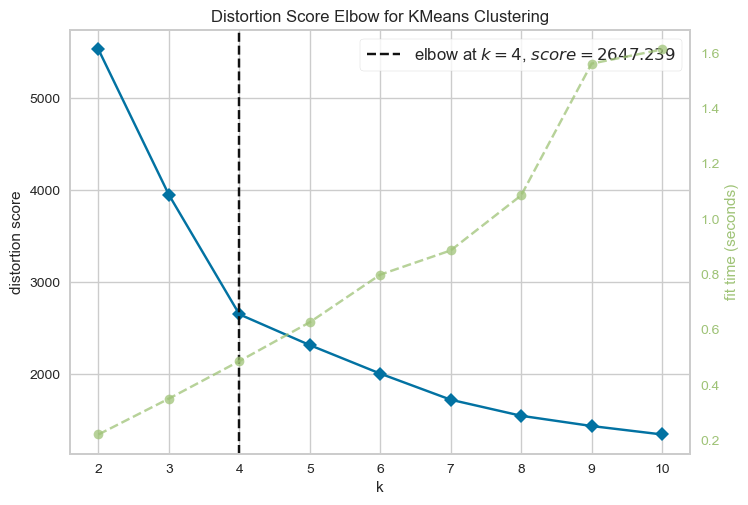

Silhouette Score: 0.27
Davies-Bouldin Score: 1.45


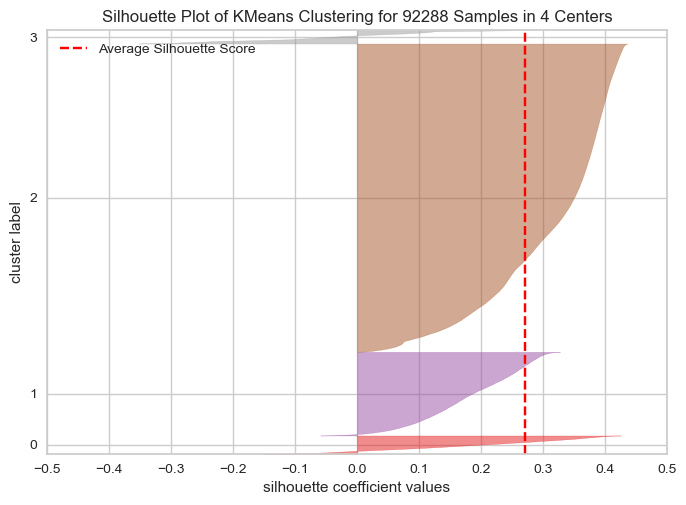

In [17]:
pca_kmeans('css5')

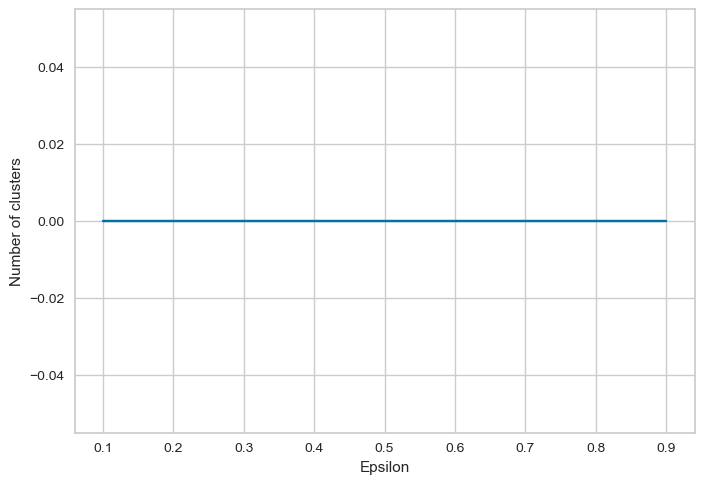

NameError: name 'pca_components' is not defined

In [150]:
dbscan('css5')

In [15]:
kmean("css5", pca("css5"))

NameError: name 'kmean' is not defined

In [13]:
kmean('css5')

NameError: name 'kmean' is not defined

In [153]:
df = 'css4'
path = Path(os.getcwd()) 
p_parent = path.parent
data_path = str(p_parent) + r"\data" + "\\" + str(df) + ".csv"
df = pd.read_csv(str(data_path)).set_index("customer_unique_id")    
clean_dataset(df)

X = df.values   

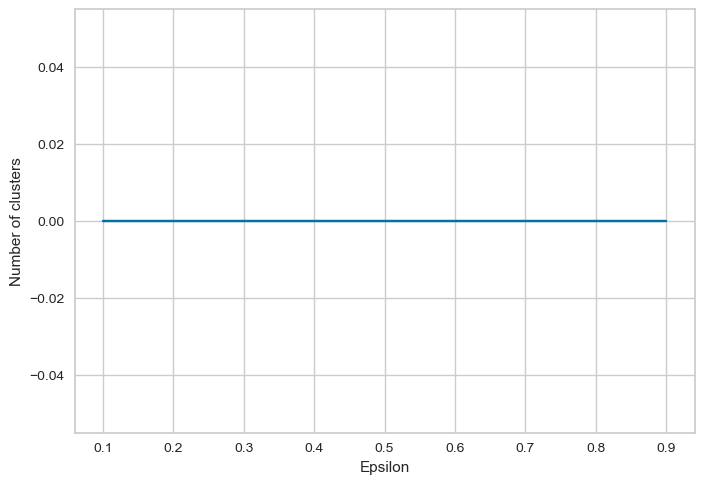

In [154]:
epsilon = np.arange(0.1, 1, 0.1)
sse = []
for e in epsilon:
    dbscan = DBSCAN(eps=e)
    dbscan.fit(df)
    labels = dbscan.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    sse.append(n_clusters)
plt.plot(epsilon, sse)
plt.xlabel('Epsilon')
plt.ylabel('Number of clusters')
plt.show()

In [156]:
dbscan = DBSCAN(0.2)
dbscan.fit(df)
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
sse.append(n_clusters)

KeyboardInterrupt: 

In [157]:
# Choose the best epsilon
eps = 0.2
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps)
dbscan.fit(df)
labels = dbscan.labels_

In [ ]:
# Evaluate the clustering results using the silhouette score and Davies-Bouldin score
silhouette = silhouette_score(df, labels)
davies = davies_bouldin_score(df, labels)
print("Silhouette Score: {:.2f}".format(silhouette))
print("Davies-Bouldin Score: {:.2f}".format(davies))

In [ ]:
# Display the silhouette visualization
visualizer = SilhouetteVisualizer(dbscan)
visualizer.fit(df)
visualizer.show()